In [1]:
import numpy as np

In [2]:
# 손실함수 구하는 것
# 오차 제곱합 
# y : 출력 (신경망이 추정한 값)
# t : 정답 레이블
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2) 

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

loss1 = sum_squares_error(np.array(y1), np.array(t))
loss2 = sum_squares_error(np.array(y2), np.array(t))

loss1, loss2

(0.09750000000000003, 0.5975)

In [4]:
# 교차 엔트로피 오차 : Cross entropy error : CEE
# delta 더한 이유 : y가 0일 때 마이너스 무한대인 -inf가 되어 계산을 진행 할 수 없기때문에 최소 값을 만들어 놓음
def CEE(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [5]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

loss1 = CEE(np.array(y1), np.array(t))
loss2 = CEE(np.array(y2), np.array(t))

loss1, loss2

(0.510825457099338, 2.302584092994546)

In [6]:
import sys, os
sys.path.append(os.pardir)
import numpy as np 
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [7]:
# 훈련데이터에서 10장만 무작위로 뽑음 

train_size = x_train.shape[0]
batch_size = 10

# np.random.choice는 지정한 범위의 수 중에서 무작위로 원하는 개수만 꺼낼수 있다. 
# 즉, train_size : 60000개에서 batch_size : 10개를 무작위로 골라내는 것
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask] 
t_batch = t_train[batch_mask]

# 데이터의 인덱스로 사용하는 것 
batch_mask

array([58460, 34987, 59065, 40807, 39609, 39199,  9570, 23356, 54440,
        1693])

In [8]:
# batch_size 용 교차 엔트로피 오차 
def CEE(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [9]:
## 미분 나쁜 구현 
## 이유 : h에 너무 작은 값 (0.00000~~~1) 형태는 반올림 오차를 일으킴 
## 반올림 오차 : 작은 값은 생략되는 것 -> 결과에 오차가 생김 
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

In [10]:
np.float32(1e-50)

0.0

In [11]:
## 개선된 수치 미분
def numerical_diff(f, x):
    h = 1e-4 # 0.0001 
    return (f(x+h) - f(x-h)) / (2*h)

In [12]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

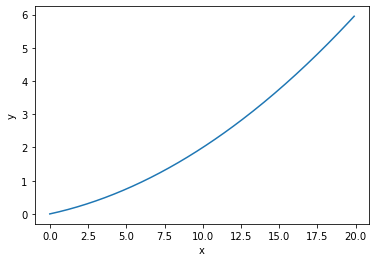

In [13]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) 
y = function_1(x)

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.show()

In [14]:
numerical_diff(function_1, 5)

0.1999999999990898

In [15]:
numerical_diff(function_1, 10)

0.2999999999986347

In [16]:
# 4.3.3 편미분 
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

In [17]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [18]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [19]:
# 4.4 기울기 
# 앞에서는 편미분 할 때 변수 하나씩 따로 하였다 
# 한꺼번에 해보겠음 

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h 
        fxh1 = f(x)

        x[idx] = tmp_val - h 
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h) 
        x[idx] = tmp_val 

    return grad

In [20]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [21]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [22]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [23]:
# 4.4.1 경사 하강법
# f : 최적화 하려는 함수
# init_x : 초깃값 
# lr = 학습률 
# step_num : 경사하강법 반복 횟수 
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x 

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x 

In [24]:
def fuction_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [25]:
# 학습률이 너무 큰 경우
init_x = np.array([-3.0 , 4.0])
gradient_descent(function_2, init_x, lr = 10.0, step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [26]:
# 학습률이 너무 작은 경우
init_x = np.array([-3.0 , 4.0])
gradient_descent(function_2, init_x, lr = 1e-10, step_num = 100)

array([-2.99999994,  3.99999992])

In [27]:
# 간단한 신경망을 통해 실제로 기울기를 구하는 코드
import sys, os 
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error 
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 형상이 2x3인 가중치 매개변수 하나를 변수로 갖는다. 

    def predict(self, x):
        return np.dot(x, self.W) 

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss 

In [31]:
net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

np.argmax(p) # 최댓값의 인덱스

t = np.array([0,0,1])
net.loss(x,t)

[[ 0.8019647   0.04569553 -0.01149229]
 [ 1.22215702 -0.13943412 -0.56354579]]
[ 1.58112014 -0.09807339 -0.51408659]


2.3649038502462276

In [32]:
# 앞서 만들었던 simpleNet의 기울기를 구함 
def f(W): # W는 더미 
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)   # f는 함수, net.W는 함수 f의 인수 
print(dW)

[[ 0.45816547  0.08545901 -0.54362448]
 [ 0.6872482   0.12818852 -0.81543672]]
